### Clust PC example notebook
Requirements: causallearn

In [1]:
!pip install causal-learn
%load_ext autoreload
# !pip install Ipython --upgrade
# !pip install autoreload
# !pip install networkx
# !pip install gcastle

You should consider upgrading via the 'C:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
%cd ..

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis


In [2]:
# %load_ext autoreload # Depending on environment might not be necessary
%autoreload 2
# from ipython import autoreload
import numpy as np
import causallearn
import random
from clustcausal.algs.clust_pc import ClustPC
from clustcausal.clusterdag.cluster_dag import CDAG
from clustcausal.utils.utils import *

UsageError: Line magic function `%autoreload` not found.


In [3]:
# Define the nodes (have to be in topological ordering):
nodes = ['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']
# nodes = ['X1', 'Y1', 'Z1', 'Z2', 'Z3']
# Define the edges (have to be in topological ordering):
edges = [('X1', 'X2'), ('X3', 'X2'), ('X3', 'Z3'), ('X2', 'Z2'), ('X1','Z1'), ('Y1','Z1'), ('Y2', 'Z2'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]
# edges = [('X1','Z1'), ('Y1','Z1'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]
# Define the cluster mapping:
cluster_mapping = {'X': ['X1', 'X2', 'X3'], 'Y': ['Y1', 'Y2'], 'Z': ['Z1', 'Z2', 'Z3']}
# cluster_mapping = {'X': ['X1'], 'Y': ['Y1'], 'Z': ['Z1', 'Z2', 'Z3']}
no_clust_mapping = {'A' : ['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']}
no_clust_edges = []
# Define the cluster edges:
cluster_edges = [('X', 'Z'), ('Y', 'Z')]

In [4]:
# # Further example C-DAGs
# perfect_cluster_mapping = {'C1': ['X1'], 'C2': ['X2'], 'C3': ['X3'], \
#                    'C4': ['X4'], 'C5': ['X5'], 'C6': ['X6'], 'C7': ['X7']}
# perfect_cluster_edges = [('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C4', 'C5'), \
#                  ('C1', 'C6'), ('C4', 'C6'), ('C5', 'C6'), ('C1', 'C7'), \
#                     ('C2', 'C7'), ('C6', 'C7')]
# # Or, an actual C-DAG
# cluster_mapping = {'C1': ['X1', 'X2', 'X3'], 'C2': ['X4', 'X5'], 'C3': ['X6', 'X7']}
# cluster_edges = [('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3')]
# # Cluster mapping for 4 variables
# # cluster_mapping = {'C1': ['X1', 'X2'], 'C2':['X3','X4']}
# # cluster_edges = [('C1', 'C2')]
# cdag = CDAG(perfect_cluster_mapping, perfect_cluster_edges)
# cdag = CDAG(cluster_mapping, cluster_edges)
# cdag.node_names
# cdag.draw_cluster_graph()

INFO: oriented edge: (X1,X2)
INFO: removed edge: (X1,X3)
INFO: removed edge: (X1,Y1)
INFO: removed edge: (X1,Y2)
INFO: oriented edge: (X1,Z1)
INFO: removed edge: (X1,Z2)
INFO: removed edge: (X1,Z3)
INFO: removed edge: (X2,X3)
INFO: removed edge: (X2,Y1)
INFO: removed edge: (X2,Y2)
INFO: removed edge: (X2,Z1)
INFO: oriented edge: (X2,Z2)
INFO: removed edge: (X2,Z3)
INFO: removed edge: (X3,Y1)
INFO: removed edge: (X3,Y2)
INFO: removed edge: (X3,Z1)
INFO: removed edge: (X3,Z2)
INFO: oriented edge: (X3,Z3)
INFO: removed edge: (Y1,Y2)
INFO: oriented edge: (Y1,Z1)
INFO: oriented edge: (Y1,Z2)
INFO: removed edge: (Y1,Z3)
INFO: removed edge: (Y2,Z1)
INFO: oriented edge: (Y2,Z2)
INFO: removed edge: (Y2,Z3)
INFO: oriented edge: (Z1,Z2)
INFO: removed edge: (Z1,Z3)
INFO: oriented edge: (Z2,Z3)


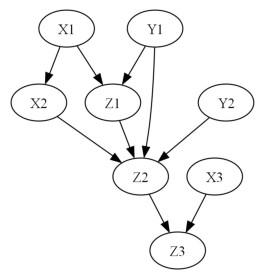

In [5]:
# Draw the ground truth graph
draw_graph(nodes, edges)

INFO: removed edge: (X,Y)
INFO: oriented edge: (X,Z)
INFO: oriented edge: (Y,Z)


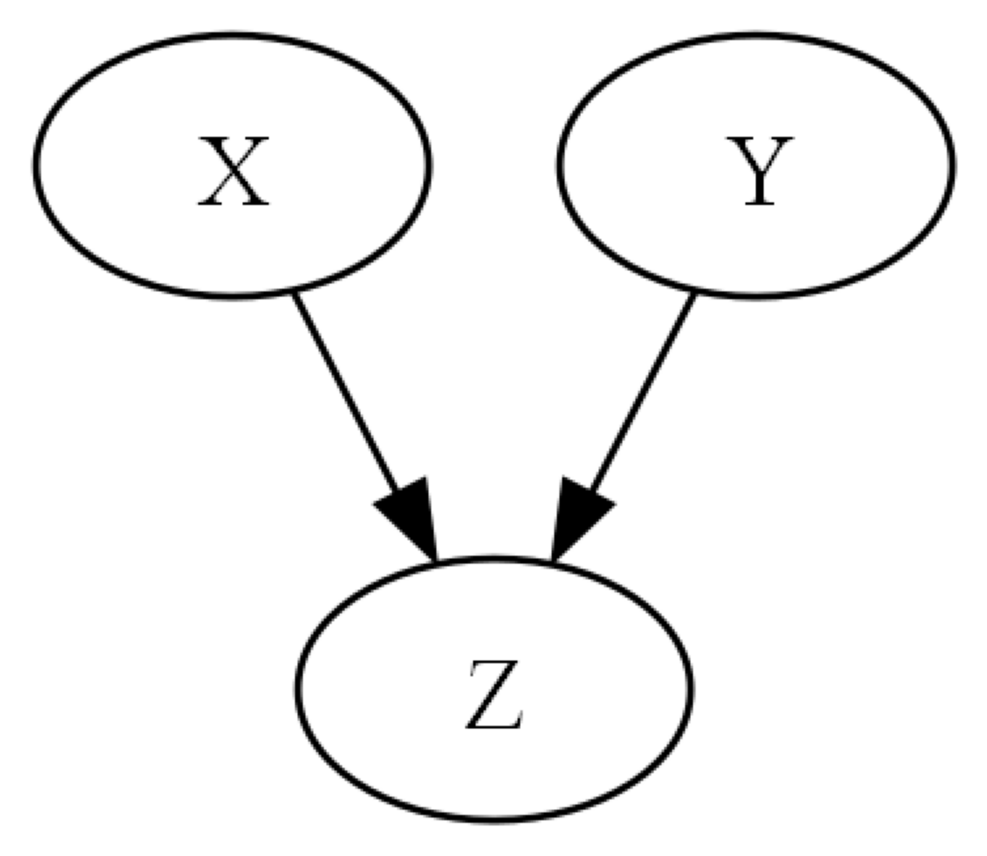

In [6]:
# Draw the cluster graph
cdag = CDAG(cluster_mapping, cluster_edges)
cdag.cluster_graph.draw_pydot_graph()

In [7]:
# Generate Gaussian ANM
# Example edge_weights, if None is given, they will be generated randomly
# edge_weights = {('X1', 'Z1'): 1, ('Y1', 'Z1'): 2, ('Y1', 'Z2'): 1, ('Z1', 'Z2'): -3, ('Z2', 'Z3'): 2}
edge_weights = None
data, edge_weights = generate_gaussian_anm(nodes, edges, edge_weights = edge_weights)
print(data.shape, edge_weights)

(10000, 8) {('X1', 'X2'): -2, ('X3', 'X2'): -3, ('X3', 'Z3'): 1, ('X2', 'Z2'): -2, ('X1', 'Z1'): -3, ('Y1', 'Z1'): 3, ('Y2', 'Z2'): 3, ('Y1', 'Z2'): 2, ('Z1', 'Z2'): 1, ('Z2', 'Z3'): 2}


In [8]:
# # For illustrative purposes, get mpdag and draw it manually (usually ClustPC handles this)
# mpdag = cdag.cdag_to_mpdag()
# cdag.draw_mpdag()

In [9]:
# Run ClustPC
# %autoreload 2
clustpc = ClustPC(cdag = cdag, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)

INFO: removed edge: (X1,Y1)
INFO: removed edge: (X1,Y2)
INFO: oriented edge: (X1,Z1)
INFO: oriented edge: (X1,Z2)
INFO: oriented edge: (X1,Z3)
INFO: removed edge: (X2,Y1)
INFO: removed edge: (X2,Y2)
INFO: oriented edge: (X2,Z1)
INFO: oriented edge: (X2,Z2)
INFO: oriented edge: (X2,Z3)
INFO: removed edge: (X3,Y1)
INFO: removed edge: (X3,Y2)
INFO: oriented edge: (X3,Z1)
INFO: oriented edge: (X3,Z2)
INFO: oriented edge: (X3,Z3)
INFO: oriented edge: (Y1,Z1)
INFO: oriented edge: (Y1,Z2)
INFO: oriented edge: (Y1,Z3)
INFO: oriented edge: (Y2,Z1)
INFO: oriented edge: (Y2,Z2)
INFO: oriented edge: (Y2,Z3)


In [10]:
clustpc.cdag.cdag_list_of_topological_sort

['X', 'Y', 'Z']

In [11]:
result_cdag = clustpc.run()


Beginning work on cluster X

Intra phase in cluster X
Cluster node indices are [0 1 2]
Local graph node indices are [0 1 2]


Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 753.87it/s] 


Neighbors of 0 in X are [1 2]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.000000
Testing edges from 0 to 2
0 ind 2 | () with p-value 0.119934
Neighbors of 1 in X are [0 2]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.000000
Testing edges from 1 to 2
1 ind 2 | () with p-value 0.308183
Neighbors of 2 in X are [0 1]
Testing edges from 2 to 0
2 ind 0 | () with p-value 0.119934
Testing edges from 2 to 1
2 ind 1 | () with p-value 0.308183
Deleted edge from 0 to 2
Deleted edge from 1 to 2
Neighbors of 0 in X are [1]
Testing edges from 0 to 1
0 dep 1 | (2,) with p-value 0.000000
Neighbors of 1 in X are [0]
Testing edges from 1 to 0
1 dep 0 | (2,) with p-value 0.000000
Neighbors of 2 in X are []

Beginning work on cluster Y

Intra phase in cluster Y
Cluster node indices are [3 4]
Local graph node indices are [3 4]


Depth=0, working on node 4: 100%|██████████| 2/2 [00:00<00:00, 500.24it/s] 


Neighbors of 3 in Y are [4]
Testing edges from 3 to 4
3 ind 4 | () with p-value 0.534931
Neighbors of 4 in Y are [3]
Testing edges from 4 to 3
4 ind 3 | () with p-value 0.534931
Deleted edge from 3 to 4

Beginning work on cluster Z

Inter phase between low cluster Z and parent X
Cluster node indices are [0 1 2 5 6 7]
Local graph node indices are [0 1 2 5 6 7]


Depth=5, working on node 6:  83%|████████▎ | 5/6 [00:00<00:00, 454.86it/s] 

Neighbors of 0 in (Z,X) are [1 5 6 7]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.000000
Testing edges from 0 to 5
0 dep 5 | () with p-value 0.000000
Testing edges from 0 to 6
0 dep 6 | () with p-value 0.000000
Testing edges from 0 to 7
0 dep 7 | () with p-value 0.000000
Neighbors of 1 in (Z,X) are [0 5 6 7]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.000000
Testing edges from 1 to 5
1 dep 5 | () with p-value 0.000000
Testing edges from 1 to 6
1 dep 6 | () with p-value 0.000000
Testing edges from 1 to 7
1 dep 7 | () with p-value 0.000000
Neighbors of 2 in (Z,X) are [5 6 7]
Testing edges from 2 to 5
2 ind 5 | () with p-value 0.179920
Testing edges from 2 to 6
2 ind 6 | () with p-value 0.822226
Testing edges from 2 to 7
2 dep 7 | () with p-value 0.000000
Neighbors of 5 in (Z,X) are [0 1 2 6 7]
Testing edges from 5 to 0
5 dep 0 | () with p-value 0.000000
Testing edges from 5 to 1
5 dep 1 | () with p-value 0.000000
Testing edges from 5 to 2
5 ind 2 | () with p-value 0.1

Depth=6, working on node 7: 100%|██████████| 6/6 [00:00<00:00, 782.15it/s] 


Neighbors of 7 in (Z,X) are [2 6]
Testing edges from 7 to 2
7 dep 2 | (0, 1, 3, 4, 5) with p-value 0.000000
7 dep 2 | (0, 1, 3, 4, 6) with p-value 0.000000
7 dep 2 | (0, 1, 3, 5, 6) with p-value 0.000000
7 dep 2 | (0, 1, 4, 5, 6) with p-value 0.000000
7 dep 2 | (0, 3, 4, 5, 6) with p-value 0.000000
7 dep 2 | (1, 3, 4, 5, 6) with p-value 0.000000
Testing edges from 7 to 6
7 dep 6 | (0, 1, 2, 3, 4) with p-value 0.000000
7 dep 6 | (0, 1, 2, 3, 5) with p-value 0.000000
7 dep 6 | (0, 1, 2, 4, 5) with p-value 0.000000
7 dep 6 | (0, 1, 3, 4, 5) with p-value 0.000000
7 dep 6 | (0, 2, 3, 4, 5) with p-value 0.000000
7 dep 6 | (1, 2, 3, 4, 5) with p-value 0.000000
Neighbors of 0 in (Z,X) are [1 5]
Testing edges from 0 to 1
0 dep 1 | (2, 3, 4, 5, 6, 7) with p-value 0.000000
Testing edges from 0 to 5
0 dep 5 | (1, 2, 3, 4, 6, 7) with p-value 0.000000
Neighbors of 1 in (Z,X) are [0]
Testing edges from 1 to 0
1 dep 0 | (2, 3, 4, 5, 6, 7) with p-value 0.000000
Neighbors of 2 in (Z,X) are [7]
Testing e

Depth=0, working on node 4:  40%|████      | 2/5 [00:00<00:00, 1001.03it/s]

Neighbors of 3 in (Z,Y) are [5 6 7]
Testing edges from 3 to 5
3 dep 5 | () with p-value 0.000000
Testing edges from 3 to 6
3 dep 6 | () with p-value 0.000000
Testing edges from 3 to 7
3 dep 7 | () with p-value 0.000000


Depth=1, working on node 4:  40%|████      | 2/5 [00:00<00:00, 250.17it/s] 

Neighbors of 4 in (Z,Y) are [5 6 7]
Testing edges from 4 to 5
4 ind 5 | () with p-value 0.909283
Testing edges from 4 to 6
4 dep 6 | () with p-value 0.000000
Testing edges from 4 to 7
4 dep 7 | () with p-value 0.000000
Neighbors of 5 in (Z,Y) are [3 4]
Testing edges from 5 to 3
5 dep 3 | () with p-value 0.000000
Testing edges from 5 to 4
5 ind 4 | () with p-value 0.909283
Neighbors of 6 in (Z,Y) are [3 4 7]
Testing edges from 6 to 3
6 dep 3 | () with p-value 0.000000
Testing edges from 6 to 4
6 dep 4 | () with p-value 0.000000
Testing edges from 6 to 7
6 dep 7 | () with p-value 0.000000
Neighbors of 7 in (Z,Y) are [3 4 6]
Testing edges from 7 to 3
7 dep 3 | () with p-value 0.000000
Testing edges from 7 to 4
7 dep 4 | () with p-value 0.000000
Testing edges from 7 to 6
7 dep 6 | () with p-value 0.000000
Deleted edge from Y2 to Z1
Neighbors of 3 in (Z,Y) are [5 6 7]
Testing edges from 3 to 5
3 dep 5 | (0,) with p-value 0.000000
3 dep 5 | (1,) with p-value 0.000000
3 dep 5 | (2,) with p-va

Depth=3, working on node 7: 100%|██████████| 5/5 [00:00<00:00, 199.69it/s] 


Neighbors of 4 in (Z,Y) are [6 7]
Testing edges from 4 to 6
4 dep 6 | (0,) with p-value 0.000000
4 dep 6 | (1,) with p-value 0.000000
4 dep 6 | (2,) with p-value 0.000000
4 dep 6 | (3,) with p-value 0.000000
4 dep 6 | (5,) with p-value 0.000000
4 dep 6 | (7,) with p-value 0.000000
Testing edges from 4 to 7
4 dep 7 | (0,) with p-value 0.000000
4 dep 7 | (1,) with p-value 0.000000
4 dep 7 | (2,) with p-value 0.000000
4 dep 7 | (3,) with p-value 0.000000
4 dep 7 | (5,) with p-value 0.000000
4 ind 7 | (6,) with p-value 0.688343
Neighbors of 5 in (Z,Y) are [3]
Testing edges from 5 to 3
5 dep 3 | (0,) with p-value 0.000000
5 dep 3 | (1,) with p-value 0.000000
5 dep 3 | (2,) with p-value 0.000000
5 dep 3 | (4,) with p-value 0.000000
5 dep 3 | (6,) with p-value 0.000000
5 dep 3 | (7,) with p-value 0.000000
Neighbors of 6 in (Z,Y) are [3 4 7]
Testing edges from 6 to 3
6 dep 3 | (0,) with p-value 0.000000
6 dep 3 | (1,) with p-value 0.000000
6 dep 3 | (2,) with p-value 0.000000
6 dep 3 | (4,) wi

Depth=2, working on node 7: 100%|██████████| 3/3 [00:00<00:00, 746.76it/s] 


Neighbors of 5 in Z are []
Neighbors of 6 in Z are [7]
Testing edges from 6 to 7
6 dep 7 | () with p-value 0.000000
Neighbors of 7 in Z are [6]
Testing edges from 7 to 6
7 dep 6 | () with p-value 0.000000
Neighbors of 5 in Z are []
Neighbors of 6 in Z are [7]
Testing edges from 6 to 7
6 dep 7 | (0,) with p-value 0.000000
6 dep 7 | (1,) with p-value 0.000000
6 dep 7 | (2,) with p-value 0.000000
6 dep 7 | (3,) with p-value 0.000000
6 dep 7 | (4,) with p-value 0.000000
6 dep 7 | (5,) with p-value 0.000000
Neighbors of 7 in Z are [6]
Testing edges from 7 to 6
7 dep 6 | (0,) with p-value 0.000000
7 dep 6 | (1,) with p-value 0.000000
7 dep 6 | (2,) with p-value 0.000000
7 dep 6 | (3,) with p-value 0.000000
7 dep 6 | (4,) with p-value 0.000000
7 dep 6 | (5,) with p-value 0.000000
Neighbors of 5 in Z are []
Neighbors of 6 in Z are [7]
Testing edges from 6 to 7
6 dep 7 | (0, 1) with p-value 0.000000
6 dep 7 | (0, 2) with p-value 0.000000
6 dep 7 | (0, 3) with p-value 0.000000
6 dep 7 | (0, 4) w

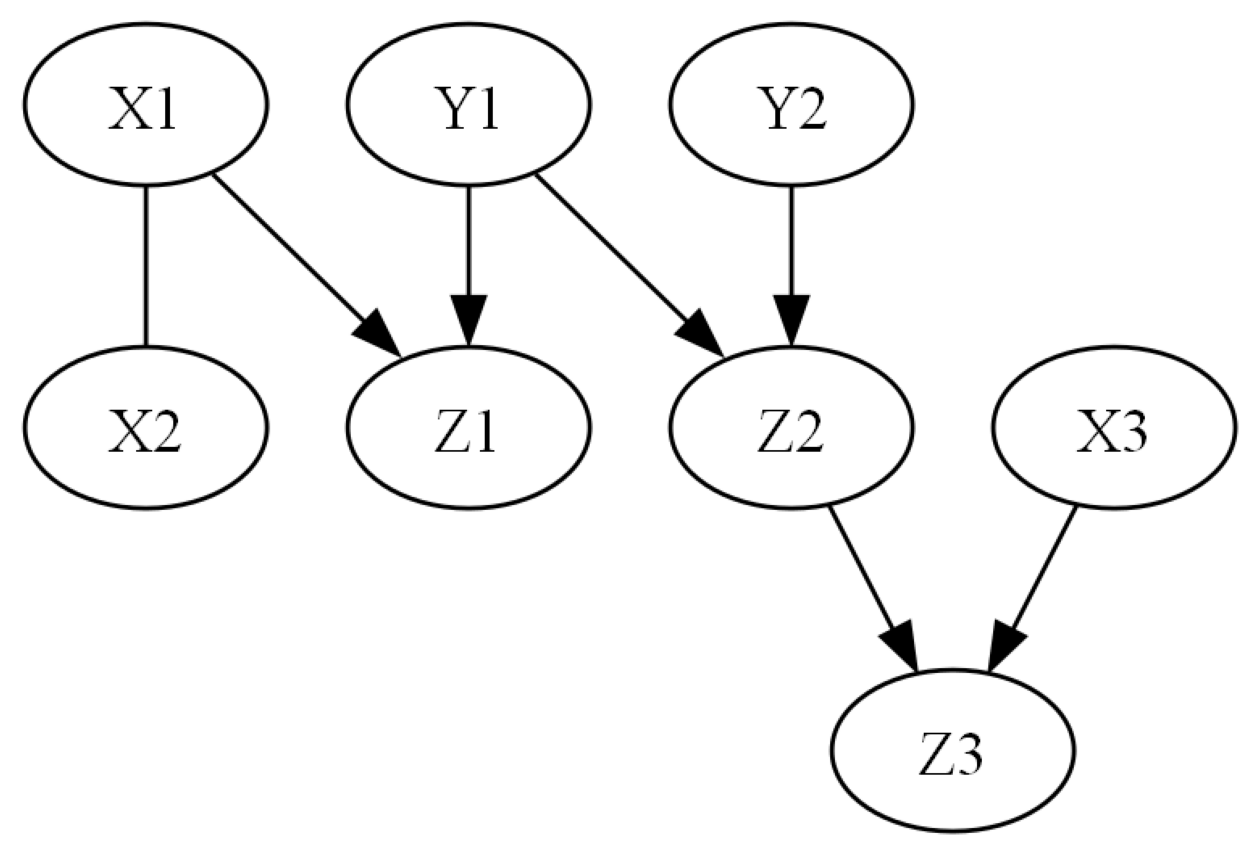

In [12]:
result_cdag.draw_pydot_graph()

Depth=4, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 889.50it/s] 


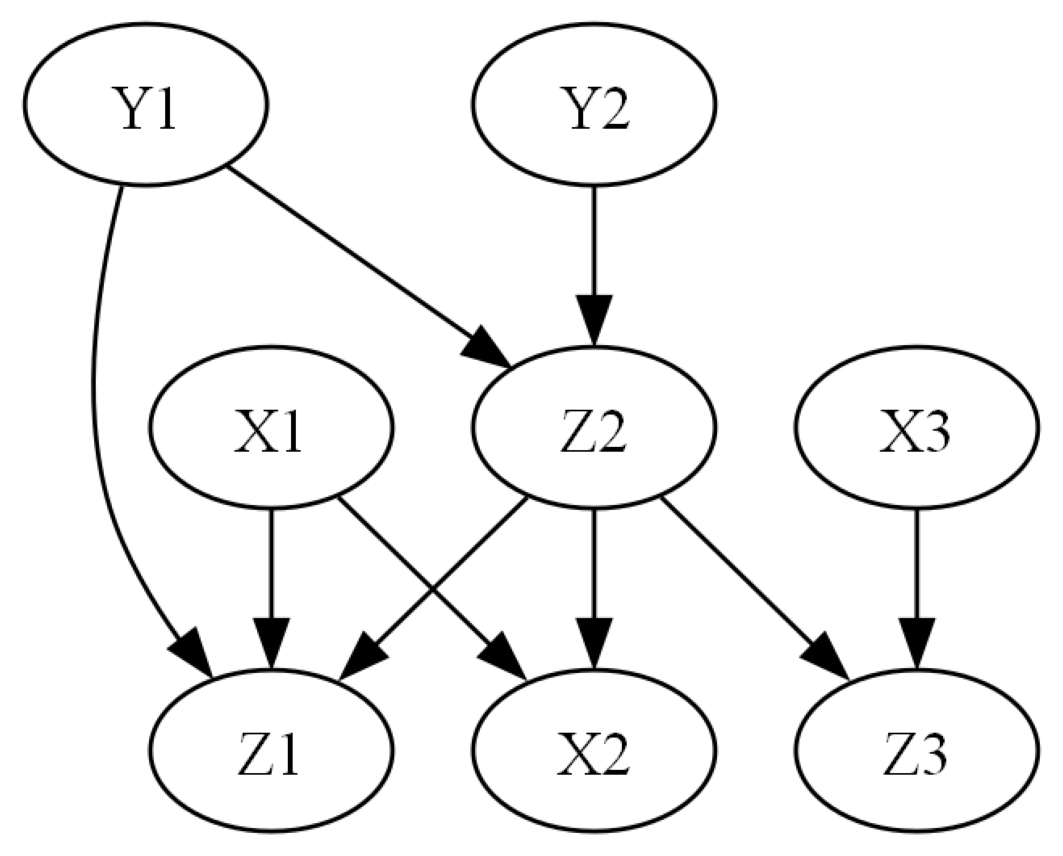

In [13]:
# comparison to pc from causallearn
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(data)
causallearn_cg.node_names = nodes
causallearn_cg.draw_pydot_graph(labels = nodes)

In [14]:
causallearn_cg.node_names

['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']

INFO: oriented edge: (X1,X2)
INFO: removed edge: (X1,X3)
INFO: removed edge: (X1,Y1)
INFO: removed edge: (X1,Y2)
INFO: oriented edge: (X1,Z1)
INFO: removed edge: (X1,Z2)
INFO: removed edge: (X1,Z3)
INFO: removed edge: (X2,X3)
INFO: removed edge: (X2,Y1)
INFO: removed edge: (X2,Y2)
INFO: removed edge: (X2,Z1)
INFO: oriented edge: (X2,Z2)
INFO: removed edge: (X2,Z3)
INFO: removed edge: (X3,Y1)
INFO: removed edge: (X3,Y2)
INFO: removed edge: (X3,Z1)
INFO: removed edge: (X3,Z2)
INFO: oriented edge: (X3,Z3)
INFO: removed edge: (Y1,Y2)
INFO: oriented edge: (Y1,Z1)
INFO: oriented edge: (Y1,Z2)
INFO: removed edge: (Y1,Z3)
INFO: removed edge: (Y2,Z1)
INFO: oriented edge: (Y2,Z2)
INFO: removed edge: (Y2,Z3)
INFO: oriented edge: (Z1,Z2)
INFO: removed edge: (Z1,Z3)
INFO: oriented edge: (Z2,Z3)


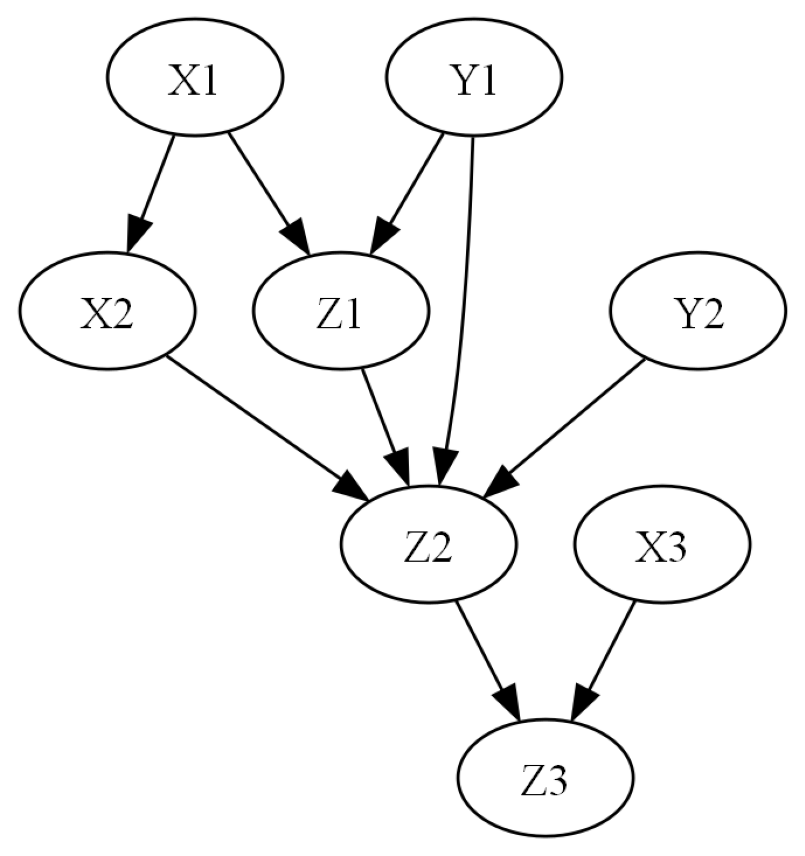

In [15]:
draw_graph(nodes, edges)

### Comparing CPC implementation to PC baseline

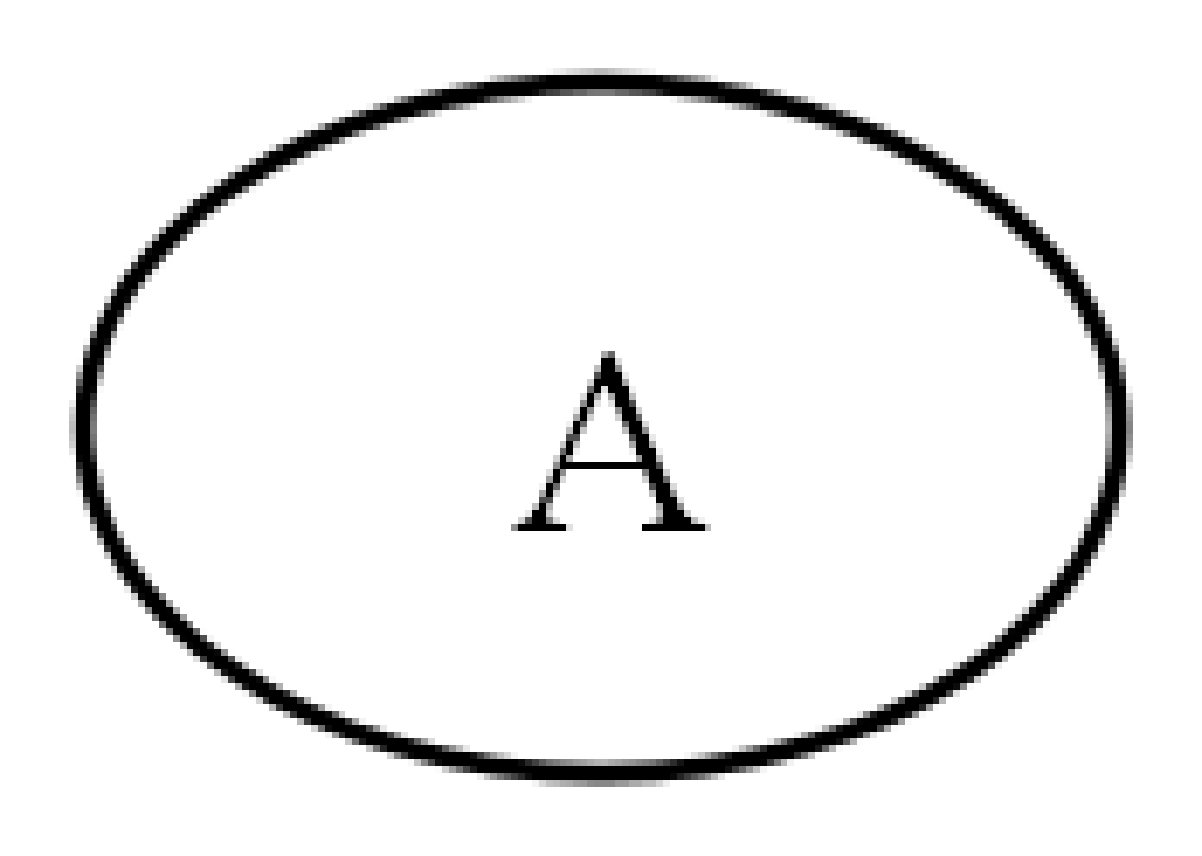

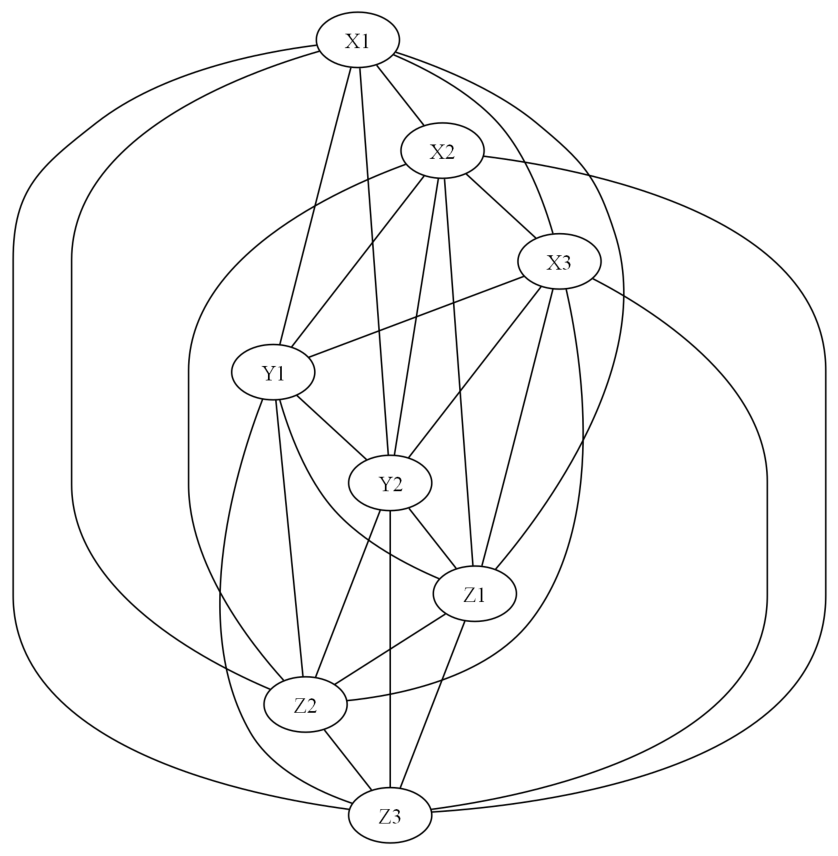

In [16]:
no_clust = CDAG(no_clust_mapping, no_clust_edges)
no_clust.draw_cluster_graph()
no_clust.cdag_to_mpdag()
no_clust.draw_mpdag()

INFO: oriented edge: (X1,X2)
INFO: removed edge: (X1,X3)
INFO: removed edge: (X1,Y1)
INFO: removed edge: (X1,Y2)
INFO: oriented edge: (X1,Z1)
INFO: removed edge: (X1,Z2)
INFO: removed edge: (X1,Z3)
INFO: removed edge: (X2,X3)
INFO: removed edge: (X2,Y1)
INFO: removed edge: (X2,Y2)
INFO: removed edge: (X2,Z1)
INFO: oriented edge: (X2,Z2)
INFO: removed edge: (X2,Z3)
INFO: removed edge: (X3,Y1)
INFO: removed edge: (X3,Y2)
INFO: removed edge: (X3,Z1)
INFO: removed edge: (X3,Z2)
INFO: oriented edge: (X3,Z3)
INFO: removed edge: (Y1,Y2)
INFO: oriented edge: (Y1,Z1)
INFO: oriented edge: (Y1,Z2)
INFO: removed edge: (Y1,Z3)
INFO: removed edge: (Y2,Z1)
INFO: oriented edge: (Y2,Z2)
INFO: removed edge: (Y2,Z3)
INFO: oriented edge: (Z1,Z2)
INFO: removed edge: (Z1,Z3)
INFO: oriented edge: (Z2,Z3)


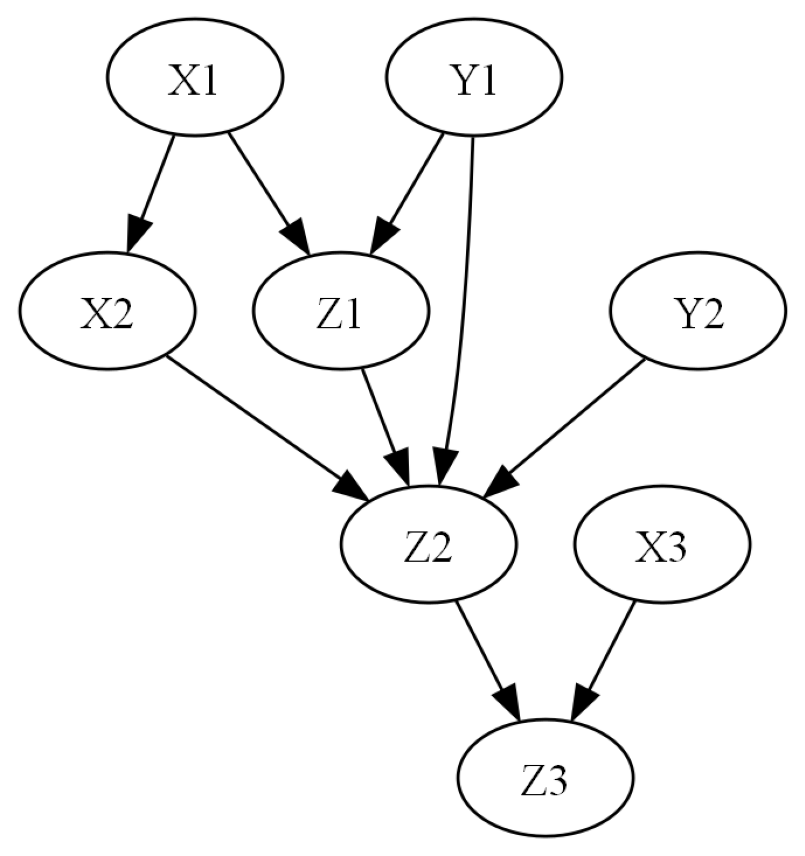

In [17]:
# ground truth
draw_graph(nodes, edges)

Depth=4, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 993.97it/s] 


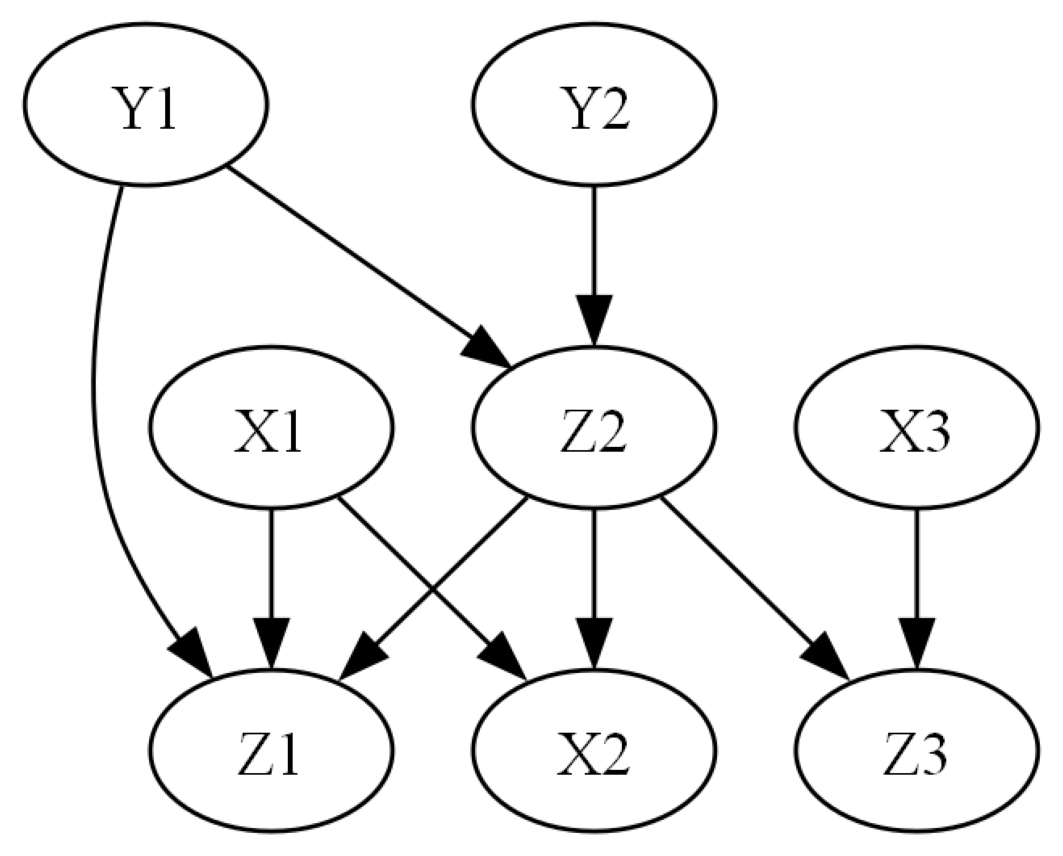

In [18]:
# PC
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(data)
causallearn_cg.node_names = nodes
causallearn_cg.draw_pydot_graph(labels = nodes)

Applying edge orientation rules
Duration of algorithm was 0.10293221473693848sec


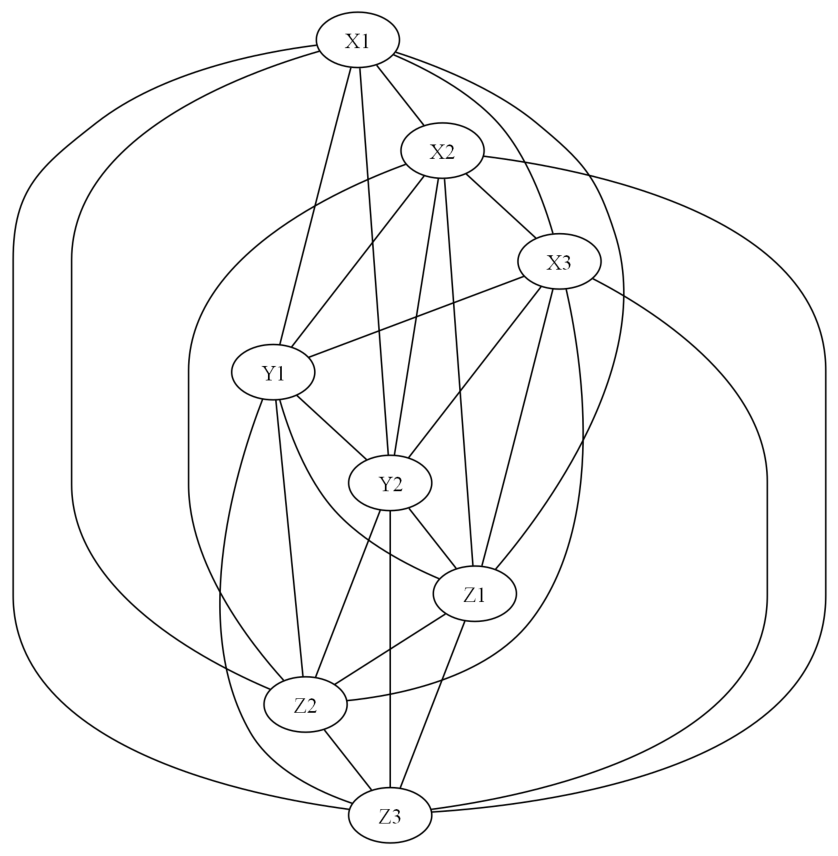

In [19]:
# CPC
%autoreload 2
clustpc = ClustPC(cdag = no_clust, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
clustpc.run()
clustpc.cdag.cg.draw_pydot_graph()

In [20]:
len(clustpc.cdag.cdag_list_of_topological_sort)

0

In [21]:
clustpc.cdag.cdag_topological_sort

<generator object topological_sort at 0x0000025C8F2F68F0>

In [22]:
list(clustpc.cdag.cluster_mapping.keys())

['A']